# Exploración de datos con pandas: Adult Income Dataset

En este notebook vamos a:

1. Cargar un dataset real directamente desde la web.
2. Entender su estructura (filas, columnas, tipos de dato).
3. Explorar problemas de calidad de datos (valores faltantes, categorías "raras", outliers).
4. Identificar posibles fuentes de sesgo y variables sensibles.

Dataset: *Adult Income* (censo de EE. UU.). La tarea típica es predecir si el ingreso de una persona es > 50K USD/año.

In [1]:
import pandas as pd

pd.set_option("display.max_columns", 50)

In [2]:
url = "https://raw.githubusercontent.com/DataResponsibly/Datasets/master/AdultIncomeData/adult.csv"
df = pd.read_csv(url)

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<Axes: title={'center': 'Distribution of Hours Worked Per Week'}, ylabel='Frequency'>

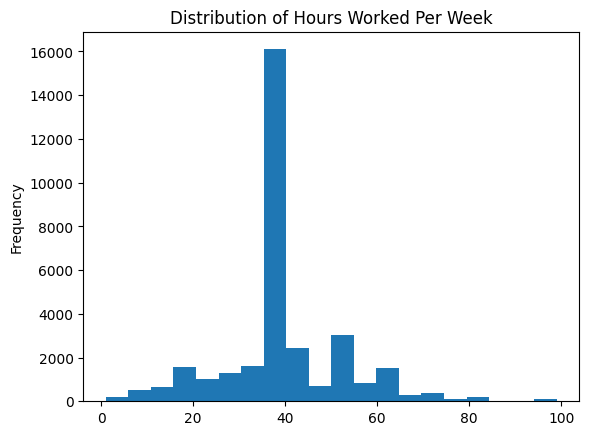

In [3]:
df['hours-per-week'].plot(kind='hist', bins=20, title='Distribution of Hours Worked Per Week')

In [3]:
# Número de filas y columnas
df.shape

(32561, 15)

In [6]:
# Nombres de columnas
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [7]:
# Información básica: tipos de datos y valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Estadísticos descriptivos de variables numéricas
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Preguntas

1. ¿Cuántas filas y columnas tiene el dataset?
2. ¿Qué tipo de unidad de análisis parece ser (personas, hogares, etc.)?
3. ¿Qué variables parecen ser numéricas y cuáles categóricas?
4. ¿Identifica algo raro en los tipos de datos o en los nombres de columnas?


In [9]:
cat_cols = ["workclass", "education", "marital-status", "occupation",
            "relationship", "race", "sex", "native-country", "income"]

for col in cat_cols:
    print(f"\n==== {col} ====")
    print(df[col].value_counts(dropna=False).head(15))


==== workclass ====
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

==== education ====
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Name: count, dtype: int64

==== marital-status ====
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

==== occupation ====
occupation
Prof-

In [ ]:
df.workclass.unique()

In [ ]:
# Conteo de "?" por columna
(df == " ?").sum().sort_values(ascending=False)

In [ ]:
# Reemplazar "?" por NaN
import numpy as np

df_clean = df.replace(" ?", np.nan)

# Porcentaje de valores faltantes por columna
missing_pct = df_clean.isna().mean().sort_values(ascending=False) * 100
missing_pct


### Preguntas

1. ¿En qué variables hay más valores faltantes (NaN / “?”)?
2. ¿Qué tipo de información falta (ocupación, país, etc.)?  
3. ¿Cómo podría afectar esto a un modelo de predicción de ingreso?
4. Si eliminara todas las filas con datos faltantes, ¿a quién estaría dejando por fuera?


In [ ]:
# Versión "agresiva": eliminar filas con algún NaN
df_dropna = df_clean.dropna()

df.shape, df_dropna.shape

In [ ]:
# Comparar distribución de algunas variables antes y después
cols_check = ["sex", "race", "native-country", "occupation"]

for col in cols_check:
    print(f"\n=== {col} - original ===")
    print(df_clean[col].value_counts(normalize=True).head(10))

    print(f"\n=== {col} - dropna ===")
    print(df_dropna[col].value_counts(normalize=True).head(10))


### Sesgos introducidos por decisiones de limpieza

- Al eliminar todas las filas con valores faltantes:
  - ¿Cambió la proporción de mujeres vs. hombres?
  - ¿Cambió la proporción de ciertas razas o países de origen?
  - ¿Qué grupos parecen perder más registros?

Piense como consultor/a:

- ¿Cómo explicaría a un cliente (banco, gobierno) que una decisión de limpieza puede **empeorar** la equidad del sistema?
- ¿Qué alternativas podría explorar en lugar de simplemente borrar filas?


In [ ]:
# Ejemplo: distribución de ingreso por sexo
pd.crosstab(df_dropna["sex"], df_dropna["income"], normalize="index") * 100


In [ ]:
# Distribución de ingreso por raza
pd.crosstab(df_dropna["race"], df_dropna["income"], normalize="index") * 100
